<a href="https://colab.research.google.com/github/carascott/1stproject/blob/main/CaraAnalysisPt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

In [17]:
df = pd.read_csv('/MichelleCara.csv', low_memory=False)
print(df)

        age     sex        marital    coninc                    degree  \
0      48.0    male        married  105852.0               high school   
1      25.0    male  never married   72774.0                bachelor's   
2      42.0    male       divorced   59542.0                bachelor's   
3      24.0    male  never married   33079.0               high school   
4      24.0  female        married   72774.0                bachelor's   
...     ...     ...            ...       ...                       ...   
23534  22.0  female  never married   18480.0               high school   
23535  29.0  female        married   45360.0                  graduate   
23536  32.0    male  never married   94080.0  associate/junior college   
23537  49.0  female        married  107520.0                  graduate   
23538  50.0    male        married   67200.0                  graduate   

              happy      health  
0        unanswered        poor  
1      pretty happy  unanswered  
2      pr

<Axes: xlabel='age', ylabel='Density'>

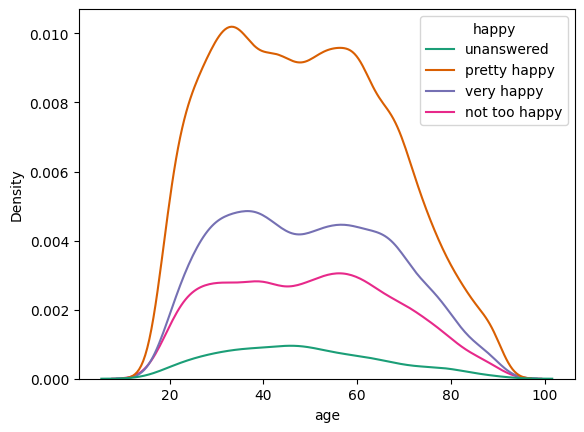

In [18]:
sns.kdeplot(data=df,x='age',hue='happy', palette='Dark2')

In [19]:
df.loc[:,['happy','age']].groupby('happy').describe()

age                                                    
                 count       mean        std   min   25%   50%   75%   max
happy                                                                     
not too happy   3865.0  49.441656  17.816969  18.0  34.0  49.0  63.0  89.0
pretty happy   12638.0  48.704463  17.665168  18.0  34.0  48.0  62.0  89.0
unanswered      1020.0  48.050000  16.751209  18.0  35.0  47.0  60.0  89.0
very happy      6016.0  49.868517  17.566778  18.0  35.0  49.0  64.0  89.0

<Axes: xlabel='age', ylabel='Density'>

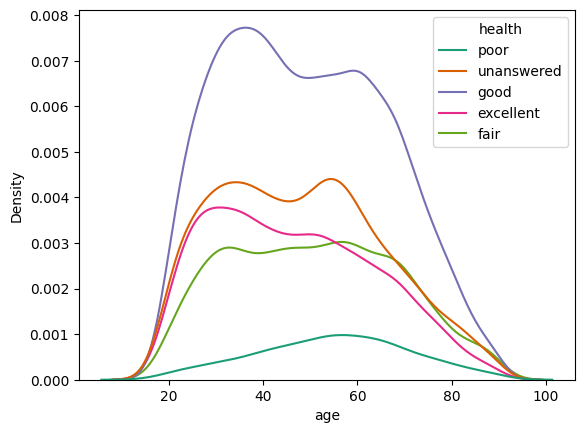

In [6]:
sns.kdeplot(data=df,x='age',hue='health', palette='Dark2')

In [20]:
df.loc[:,['health','age']].groupby('health').describe()

age                                                    
             count       mean        std   min   25%   50%   75%   max
health                                                                
excellent   4218.0  46.448080  17.367522  18.0  32.0  45.0  60.0  89.0
fair        3939.0  51.214521  18.020273  18.0  36.0  51.0  65.0  89.0
good        9085.0  49.209356  17.416991  18.0  35.0  48.0  63.0  89.0
poor        1002.0  55.125749  16.288795  18.0  43.0  55.5  67.0  89.0
unanswered  5295.0  48.287819  17.707928  18.0  34.0  48.0  61.0  89.0

In [44]:
unique_responses = df['marital'].value_counts()
print("Unique Responses:")
print(unique_responses)

na_count = df['marital'].isna().sum()
# Print the number of NAs
print(f"Number of NAs in '{'marital'}': {na_count}")

Unique Responses:
not married    17220
Name: marital, dtype: int64
Number of NAs in 'marital': 0


In [22]:
df = df[df['happy'] != 'unanswered']

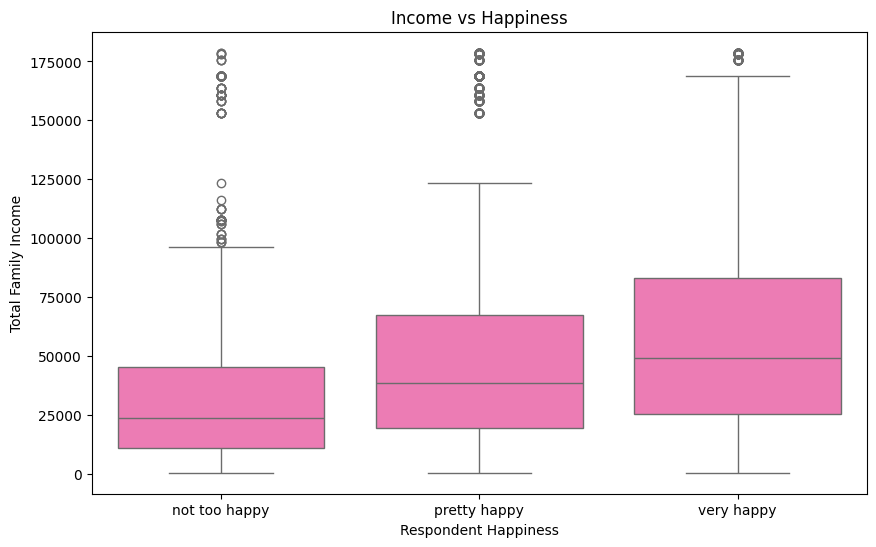

In [35]:
# Graph of income v happiness
happiness_order = ['not too happy', 'pretty happy', 'very happy']
plt.figure(figsize=(10, 6))
sns.boxplot(x='happy', y='coninc', data=df, order=happiness_order,
            color="hotpink")
plt.xlabel('Respondent Happiness')
plt.ylabel('Total Family Income')
plt.title('Income vs Happiness')
plt.show()

In [24]:
df = df[df['health'] != 'unanswered']

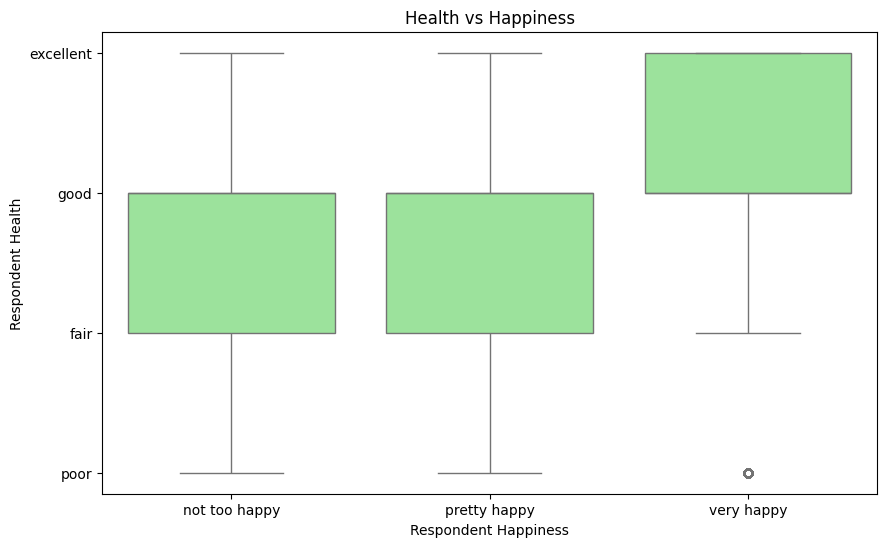

In [32]:
#  Graph of health v happiness
health_order = ['excellent', 'good', 'fair', 'poor']
df['health'] = pd.Categorical(df['health'], categories=health_order,
                              ordered=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='happy', y='health', data=df, order=happiness_order,
            hue_order=health_order, color="lightgreen")
plt.xlabel('Respondent Happiness')
plt.ylabel('Respondent Health')
plt.title('Health vs Happiness')
plt.show()